In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [3]:
#data cleansing
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#preprocesing data
df_new = df.copy()
df_new = df_new[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]] 
df_new 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [5]:
df_new["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

In [6]:
#Balancing (oversampling)
#masih data asli (bukan data latih)
X = df_new.drop(columns=["Outcome"]) #fitur
y = df_new["Outcome"] #kolom

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#panggil MOTE
smote = SMOTE(random_state=42)

In [8]:
from collections import Counter
smote = SMOTE(random_state=42)
#Split data menjadi Train (80%) dan Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling dengan SMOTE (hanya pada training data)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribusi kelas setelah SMOTE (Oversampling):", Counter(y_train_smote))

Distribusi kelas setelah SMOTE (Oversampling): Counter({0: 1453, 1: 1453})


#Balancing (Undersampling)

In [10]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=42)

In [11]:
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train) 

In [12]:
print("Distribusi kelas setelah undersampling (Random Under Sampling):", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random Under Sampling): Counter({0: 761, 1: 761})


#Training Testing ML

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
#memuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#model_knn.fit(X_train_smote, y_train_smote)
model_knn.fit(X_train_smote, y_train_smote)

#Menampilkan uji peforma sisi Training
y_pred_train_KNN = model_knn.predict(X_train_smote)

#Menampilkan uji peforma sisi testing
y_pred_test_KNN = model_knn.predict(X_test)

In [16]:
#2.2 Meyriks Evaluasi Model KNN
#menampilkan akurasi sisi training
akurasi_training_knn = accuracy_score(y_train_smote,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  96.1459050240881
Hasil Akurasinya Testingnya adalah :  85.01805054151625


In [17]:
print("Classification report Training")
print(classification_report (y_train_smote, y_pred_train_KNN))

Classification report Training
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1453
           1       0.95      0.98      0.96      1453

    accuracy                           0.96      2906
   macro avg       0.96      0.96      0.96      2906
weighted avg       0.96      0.96      0.96      2906



##### print("Classification report Testing")
print(classification_report (y_test, y_pred_test_KNN))

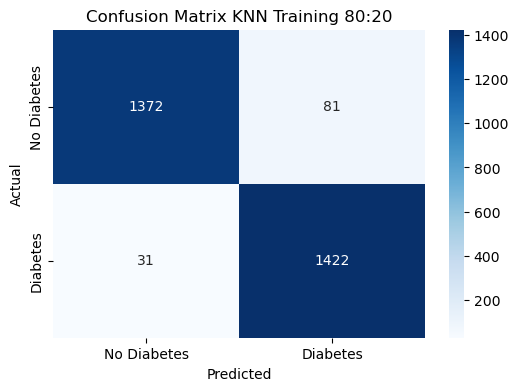

In [19]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 80:20")
plt.show()

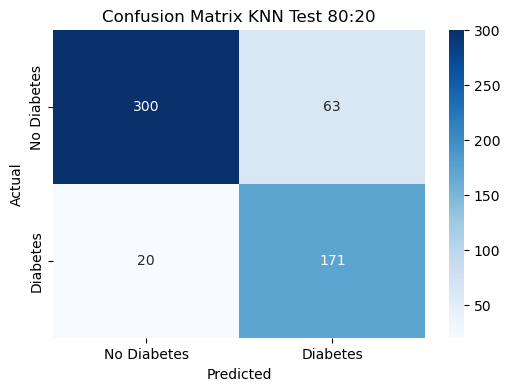

In [20]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Test 80:20")
plt.show()

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
#2.3 Metrik naive bayes

# Memuat model Naive Bayes
model_nb = GaussianNB()

# Melatih model
model_nb.fit(X_train_smote, y_train_smote)

# Menampilkan uji performa sisi Training
y_pred_train_nb = model_nb.predict(X_train_smote)

# Menampilkan uji performa sisi Testing
y_pred_test_nb = model_nb.predict(X_test)


In [23]:
#2.2 Meyriks Evaluasi Model KNN
#menampilkan akurasi sisi training
akurasi_training_bn = accuracy_score(y_train_smote,y_pred_train_nb)

#menampilkan akurasi sisi testing
akurasi_testing_bn = accuracy_score(y_test,y_pred_test_nb)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_bn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_bn*100)

Hasil Akurasinya Trainingnya adalah :  73.81280110117
Hasil Akurasinya Testingnya adalah :  74.18772563176896


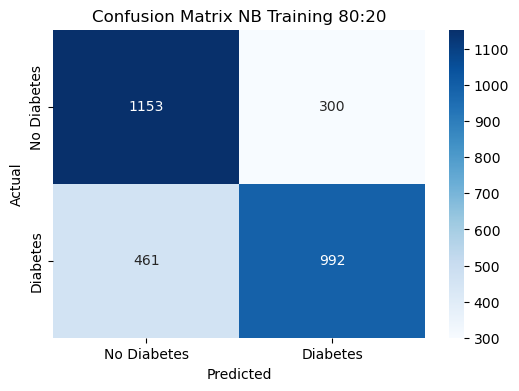

In [24]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 80:20")
plt.show()

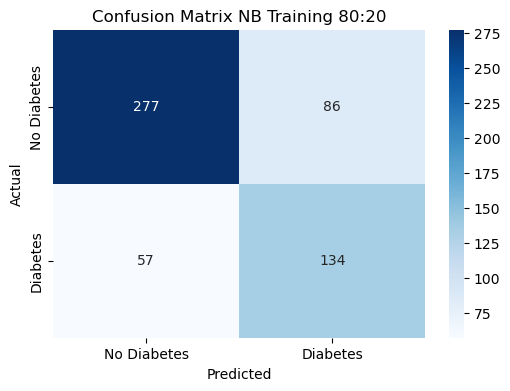

In [25]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 80:20")
plt.show()

In [26]:
#2.6 Random Forest
from sklearn.ensemble import RandomForestClassifier

In [27]:
#memuat
model_rfc = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih
model_rfc.fit(X_train_smote, y_train_smote)

#menghitung training
y_pred_train_rfc = model_rfc.predict(X_train_smote)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(X_test)

In [28]:
#2.2 Meyriks Evaluasi Model RFC
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_smote,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya adalah :  100.0
Hasil Akurasinya Testingnya adalah :  99.63898916967509


In [29]:
print("Classification report Training")
print(classification_report (y_train_smote, y_pred_train_rfc))

Classification report Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2906
   macro avg       1.00      1.00      1.00      2906
weighted avg       1.00      1.00      1.00      2906



In [30]:
print("Classification report Testing")
print(classification_report (y_test, y_pred_test_rfc))

Classification report Testing
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



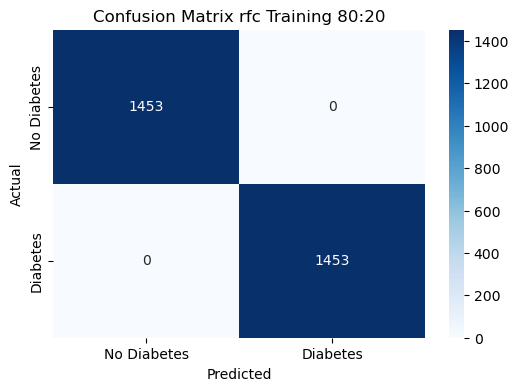

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix rfc Training 80:20")
plt.show()

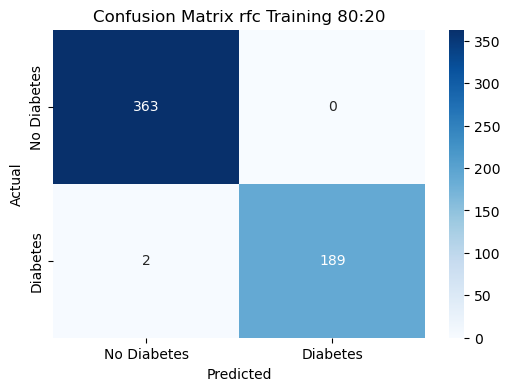

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix rfc Training 80:20")
plt.show()

cara simpan model

In [34]:
import joblib

In [35]:
joblib.dump(model_rfc, "model_diabet_rfc.joblib")

['model_diabet_rfc.joblib']

In [36]:
import pickle
with open('model_rfc.pkl', 'wb') as f:
    pickle.dump(model_rfc, f)

4. cara memuat model

In [38]:
muat_model = joblib.load("model_diabet_rfc.joblib")

In [39]:
#memuat model yang telah disimpan
with open('model_rfc.pkl', 'rb') as f:
    model = pickle.load(f)


5. Memprediksi Data Baru (Program Prediksi)

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [42]:
def prediksi_diabetes(model):
    print("=== Silahkan Masukan data pasien ===")
    Pregnancies = int(input("Masukan Pregnancies : "))
    Glucose = int(input("Masukan Kadar Glukosa : "))
    BloodPressure = int(input("Masukan Tekanan Darah : "))
    SkinThickness = int(input("Masukan Ketebalan Kulit : "))
    Insulin = int(input("Masukan Kadar insulin : "))
    BMI = float(input("Masukan BMI pasien : "))
    DiabetesPedigreeFunction = float(input("Masukan DPF pasien : "))
    Age= int(input("Masukan Umur pasien : "))
    
    data_baru = np.array([Pregnancies,
                          Glucose,
                          BloodPressure,
                          SkinThickness,
                          Insulin,
                          BMI,
                          DiabetesPedigreeFunction,
                          Age])
    
    data_baru = data_baru.reshape(1,-1)
    
    prediksi_baru = model.predict(data_baru) 
    if prediksi_baru == 1:
        print("Pasien terkena Diabetes")
    else:
        print("Pasien Tidak terkena diabetes")



In [43]:
prediksi_diabetes(model_rfc)

=== Silahkan Masukan data pasien ===


Masukan Pregnancies :  2
Masukan Kadar Glukosa :  2
Masukan Tekanan Darah :  2
Masukan Ketebalan Kulit :  2
Masukan Kadar insulin :  2
Masukan BMI pasien :  2
Masukan DPF pasien :  2
Masukan Umur pasien :  2


Pasien Tidak terkena diabetes


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [44]:
from collections import Counter
# Split data menjadi Train (80%) dan Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Undersampling dengan RandomUnderSampler (hanya pada training data)
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

print("Distribusi kelas setelah undersampling:", Counter(y_train_under))

Distribusi kelas setelah undersampling: Counter({0: 761, 1: 761})


In [45]:
#model_knn.fit(X_train_smote, y_train_smote)
model_knn.fit(X_train_under, y_train_under)

#Menampilkan uji peforma sisi Training
y_pred_train_KNN = model_knn.predict(X_train_under)

#Menampilkan uji peforma sisi testing
y_pred_test_KNN = model_knn.predict(X_test)

In [46]:
#2.2 Meyriks Evaluasi Model KNN
#menampilkan akurasi sisi training
akurasi_training_knn_undersampling = accuracy_score(y_train_under,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  96.1459050240881
Hasil Akurasinya Testingnya adalah :  76.71480144404332


In [47]:
print("Classification report Training Undersampling")
print(classification_report (y_train_under, y_pred_train_KNN))

Classification report Training Undersampling
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       761
           1       0.86      0.94      0.90       761

    accuracy                           0.89      1522
   macro avg       0.90      0.89      0.89      1522
weighted avg       0.90      0.89      0.89      1522



In [48]:
print("Classification report Testing Undersampling")
print(classification_report (y_test, y_pred_test_KNN))

Classification report Testing Undersampling
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       363
           1       0.63      0.79      0.70       191

    accuracy                           0.77       554
   macro avg       0.75      0.77      0.76       554
weighted avg       0.79      0.77      0.77       554



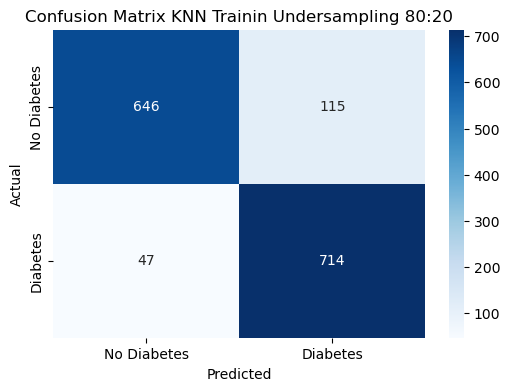

In [49]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Trainin Undersampling 80:20")
plt.show()

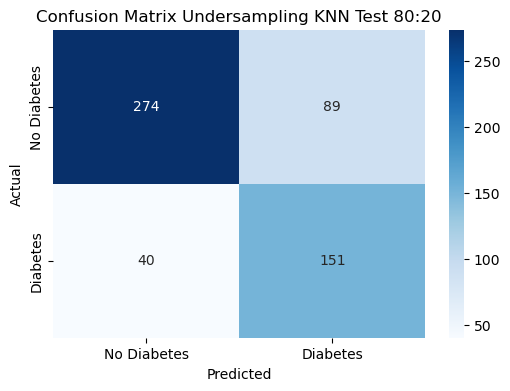

In [50]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Undersampling KNN Test 80:20")
plt.show()

In [51]:
# Melatih model
model_nb.fit(X_train_under, y_train_under)

# Menampilkan uji performa sisi Training
y_pred_train_under_nb = model_nb.predict(X_train_under)

# Menampilkan uji performa sisi Testing
y_pred_test_under_nb = model_nb.predict(X_test)

In [52]:
#2.2 Meyriks Evaluasi Model KNN
#menampilkan akurasi sisi training
akurasi_training_under_bn = accuracy_score(y_train_under,y_pred_train_under_nb)

#menampilkan akurasi sisi testing
akurasi_testing_bn = accuracy_score(y_test,y_pred_test_under_nb)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_under_bn*100)
print("Hasil Akurasinya Testingnya adalah : ", akurasi_testing_bn*100)

Hasil Akurasinya Trainingnya adalah :  74.70433639947439
Hasil Akurasinya Testingnya adalah :  74.54873646209387


In [53]:
print("Classification report Training")
print(classification_report (y_train_under, y_pred_train_under_nb))

Classification report Training
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       761
           1       0.78      0.69      0.73       761

    accuracy                           0.75      1522
   macro avg       0.75      0.75      0.75      1522
weighted avg       0.75      0.75      0.75      1522



In [54]:
print("Classification report Testing")
print(classification_report (y_test, y_pred_test_nb))

Classification report Testing
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       363
           1       0.61      0.70      0.65       191

    accuracy                           0.74       554
   macro avg       0.72      0.73      0.72       554
weighted avg       0.75      0.74      0.75       554



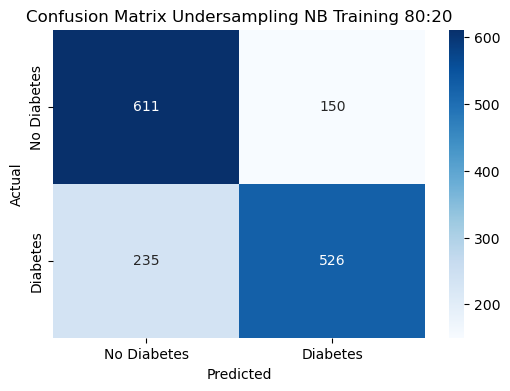

In [55]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_under_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Undersampling NB Training 80:20")
plt.show()

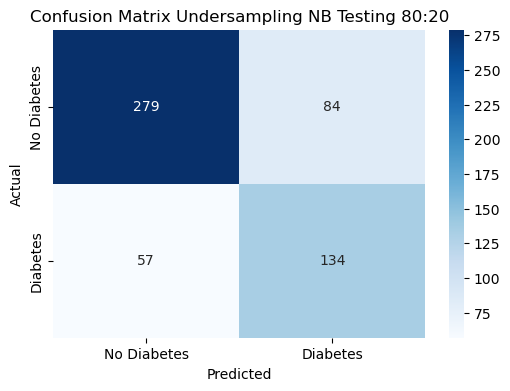

In [56]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_under_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Undersampling NB Testing 80:20")
plt.show()

In [57]:
#Rendom Forest
#melatih
model_rfc.fit(X_train_under, y_train_under)

#menghitung training
y_pred_train_under_rfc = model_rfc.predict(X_train_under)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(X_test)

In [58]:
#2.2 Meyriks Evaluasi Model RFC
#menampilkan akurasi sisi training
akurasi_training_under_rfc = accuracy_score(y_train_under,y_pred_train_under_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_under_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_under_rfc*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya adalah :  100.0
Hasil Akurasinya Testingnya adalah :  99.63898916967509


In [59]:
print("Classification report Training Under Sampling RFC")
print(classification_report (y_train_under, y_pred_train_under_rfc))

Classification report Training Under Sampling RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       761
           1       1.00      1.00      1.00       761

    accuracy                           1.00      1522
   macro avg       1.00      1.00      1.00      1522
weighted avg       1.00      1.00      1.00      1522



In [60]:
print("Classification report Testing Undersampling RFC")
print(classification_report (y_test, y_pred_test_rfc))

Classification report Testing Undersampling RFC
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       363
           1       0.91      0.99      0.95       191

    accuracy                           0.96       554
   macro avg       0.95      0.97      0.96       554
weighted avg       0.97      0.96      0.96       554



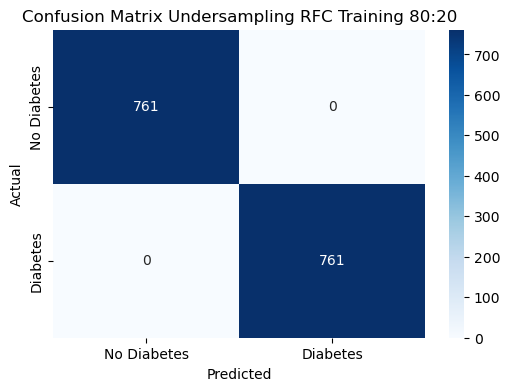

In [61]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_under, y_pred_train_under_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Undersampling RFC Training 80:20")
plt.show()

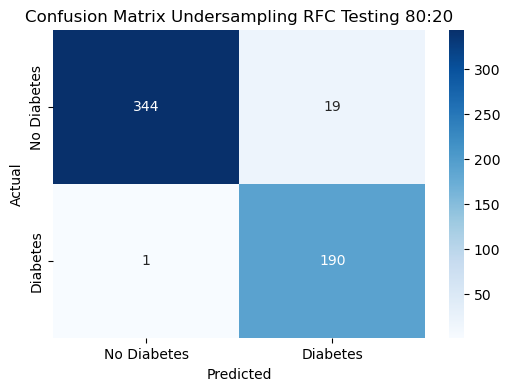

In [62]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Undersampling RFC Testing 80:20")
plt.show()